# Regression and Classification Assignment

This notebook uses the data discussed in regression_and_classification notebook.   You may want to review that if you
have trouble with the assignment.

## 1. The data

First we do some imports and load the data from the `sklearn` module.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn import linear_model
import numpy as np


data = load_iris()
features = data['data']
feature_names = data['feature_names']
target = data['target']

## 2.  The questions

**Q1**

Don't take my word for it that subsets of the 4 Iris features always produce a worse classifier.
Try it out.

Change the selector array in the next cell and execute the code
in the cell to try out your own favorite subsets
of features.  No subset of 2 or even 3 features performs as well as using all 4.

For example, using this selector
```
selector = np.array([True,True,False,True])
```

leaves out just  the third feature.  Here's your challenge: Find the best 2-feature
system (it performs almost as well as any 3-feature system), and the best
3-feature system.  Hint for the 2-feature problem, if you want to get there more
quickly.  Look at our plots of two-feature systems in the "Plotting Attributes" section of the regression_and_classification.ipynb notebook (Section 2).  Which one **looks**
like it gives the best separation?

In [ ]:
#Use selected features
selector = np.array([True,True,False,True])
X = features[:,selector]
Y = target
logreg = linear_model.LogisticRegression(C=1e5, solver='lbfgs',multi_class='auto')
logreg.fit(X, Y)
predicted = logreg.predict(X)
accuracy_score(Y,predicted)

0.9666666666666667

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score

# Define the original selector array
selector = np.array([True, True, False, True])

# Extract the selected features
selected_indices = np.where(selector)[0]
X = features[:, selected_indices]
Y = target

# Initialize variables to keep track of best feature systems and their performance
best_2_feature_system = None
best_3_feature_system = None
best_performance_2_feature = 0
best_performance_3_feature = 0

# Loop through all possible 2-feature combinations
for i in range(X.shape[1]):
    for j in range(i + 1, X.shape[1]):
        # Create a temporary 2-feature system
        current_selector_2_feature = np.array([False, False, False])
        current_selector_2_feature[i] = True
        current_selector_2_feature[j] = True
        X_2_feature = X[:, current_selector_2_feature]

        # Train and evaluate a logistic regression model on the 2-feature system
        logreg = linear_model.LogisticRegression(C=1e5, solver='lbfgs', multi_class='auto')
        logreg.fit(X_2_feature, Y)
        predicted_2_feature = logreg.predict(X_2_feature)
        accuracy_2_feature = accuracy_score(Y, predicted_2_feature)

        # Update the best 2-feature system if necessary
        if accuracy_2_feature > best_performance_2_feature:
            best_performance_2_feature = accuracy_2_feature
            best_2_feature_system = current_selector_2_feature

# Loop through all possible 3-feature combinations
for i in range(X.shape[1]):
    for j in range(i + 1, X.shape[1]):
        for k in range(j + 1, X.shape[1]):
            # Create a temporary 3-feature system
            current_selector_3_feature = np.array([False, False, False])
            current_selector_3_feature[i] = True
            current_selector_3_feature[j] = True
            current_selector_3_feature[k] = True
            X_3_feature = X[:, current_selector_3_feature]

            # Train and evaluate a logistic regression model on the 3-feature system
            logreg = linear_model.LogisticRegression(C=1e5, solver='lbfgs', multi_class='auto')
            logreg.fit(X_3_feature, Y)
            predicted_3_feature = logreg.predict(X_3_feature)
            accuracy_3_feature = accuracy_score(Y, predicted_3_feature)

            # Update the best 3-feature system if necessary
            if accuracy_3_feature > best_performance_3_feature:
                best_performance_3_feature = accuracy_3_feature
                best_3_feature_system = current_selector_3_feature

# Print the best feature systems and their performance
print("Best 2-feature system: ", selected_indices[best_2_feature_system])
print("Performance: ", best_performance_2_feature)
print("Best 3-feature system: ", selected_indices[best_3_feature_system])
print("Performance: ", best_performance_3_feature)


Best 2-feature system:  [0 3]
Performance:  0.96
Best 3-feature system:  [0 1 3]
Performance:  0.9666666666666667


**Q2**

In the regression_and_classification notebook,
we implemented a function called `is_non_red` that is supposed to distinguish
class 0 from classes 1 and 2.  Here is the definition and an example of using it
on a row of the Iris dataset.

In [ ]:
def is_non_red (P):
    """
    P is a data point, all 4 attributes.

    Return True if P is in positive class.
    """
    return (P[2] - .9*P[0] + 2) > 0

P = features[-90]
print('P is in positive class: {0}'.format(is_non_red(P)))

P is in positive class: True


We call such a function a model (a model of `non-redness`). Write some code to evaluate this model's accuracy
in predicting non redness.  Before calling the `accuracy_score` function,
you will have to compute `predicted` using `is_non_red` to give you an array of predictions


To create a prediction array using `is_non_red`, apply it to every row
of `features`:

```
np.apply_along_axis(is_non_red, axis=1, arr= features)
```

You will also have to evaluate accuracy against a different standard.
You can't evaluate against the class array `target` defined above
because that has three classes and `is_non_red` essentially works with two.
You have to start by creating a different
class array that only has two classes, matching the kind of results `is_non_red` produces.
The red class is 0, so you want `True` for every class 1 or 2 iris, and
`False` for every class 0 iris. For this, use a Boolean mask on `target`.

Be sure to say what your final score **means**.  Did you you do very well
or very badly?  Using scikit learn, compute a model you can compare this model to in order to know
whether you did very well or very badly.

In [ ]:
predicted = np.apply_along_axis(is_non_red, axis=1, arr=features)

binary_target = target > 0

accuracy = accuracy_score(binary_target, predicted)
accuracy


1.0

**Q3**

Using the `rock vs. mines` data set loaded in the next cell, draw a scatterplot of the points like the ones we did in Section 2 and 3 of this tutorial for the iris data.
You will find the code in Section 3 of the rfegression_and_classification notebook will require the least modification.
This data set tries to distinguish two classes, rocks and mines, based on sonar readings.
Note, as the loading code indicates, this data has 60 features, which is a lot, so you should
just pick one pair of features out and plot them.  Crucially,
you **don't** need to plot all pairs (there are 1770 pairs), even though
with 60 features, you are unlikely to have much success using just two.

When modifying the code to draw the picture, bear in mind you really only need to
scatter the points.  You are not being asked to draw a separation line,
and you don't need to draw our point P, because it doesn't appear in this data.
You should try to give the points belonging to the two classes different colors
and shapes, as was done above.

In [ ]:
import pandas as pd

target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks mines data
mine_df = pd.read_csv(target_url, header=None, prefix="V")
mine_features = mine_df.values
(samp_sz, num_feats) = mine_features.shape
print('{0} exemplars with {1} features'.format(samp_sz, num_feats))
# The last column contains the class data.  Separate it from the others.
target = mine_features[:, 60]
# Everything else is a feature
mine_features = mine_features[:, :60]
(samp_sz, num_feats) = mine_features.shape

# Find the two classes we're trying to separate.
feat_set = list(set(target))
print('{0} classes: {1}'.format(len(feat_set), feat_set))

<ipython-input-20-493dcceebfd9>:7: FutureWarning: The prefix argument has been deprecated and will be removed in a future version. Use a list comprehension on the column names in the future.


  mine_df = pd.read_csv(target_url, header=None, prefix="V")


208 exemplars with 61 features
2 classes: ['R', 'M']


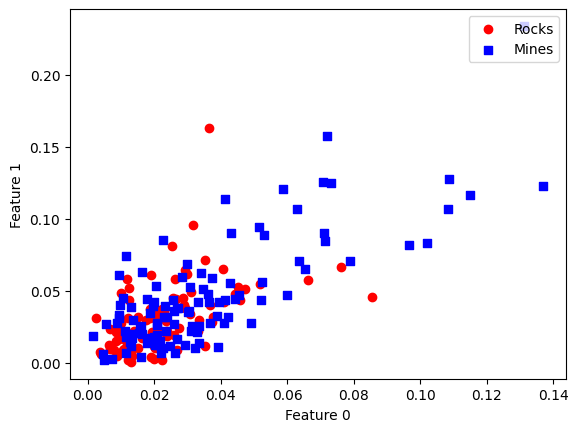

In [ ]:
import matplotlib.pyplot as plt

feature1 = 0  # Select first feature
feature2 = 1  # Select second feature

# Plot the points with different colors and shapes for different classes
plt.scatter(mine_features[target == feat_set[0], feature1], mine_features[target == feat_set[0], feature2],
            color='red', marker='o', label='Rocks')
plt.scatter(mine_features[target == feat_set[1], feature1], mine_features[target == feat_set[1], feature2],
            color='blue', marker='s', label='Mines')

# Add labels and legend
plt.xlabel('Feature {0}'.format(feature1))
plt.ylabel('Feature {0}'.format(feature2))
plt.legend(loc='upper right')

# Show the plot
plt.show()

**Q4**

Combining variables: Cheap non-linearity

The [Heidelberg stat-center](http://www.statlab.uni-heidelberg.de/data/iris/) reports a very nice result obtained by combining
the 2 petal features and the  2 sepal features by multiplication.  We end up with 2 **area** features, and a system that's almost as good as a 4-feature linear system,
at the cost of a little non-linearity (the multiplication). Here's the computation,
and the picture, both of which are very simple.  

Notice what the picture is telling us:  Petal area alone
is enough to almost perfectly perform the discrimination.  And the insight can easily be made visual.

Text(0, 0.5, 'petal area')

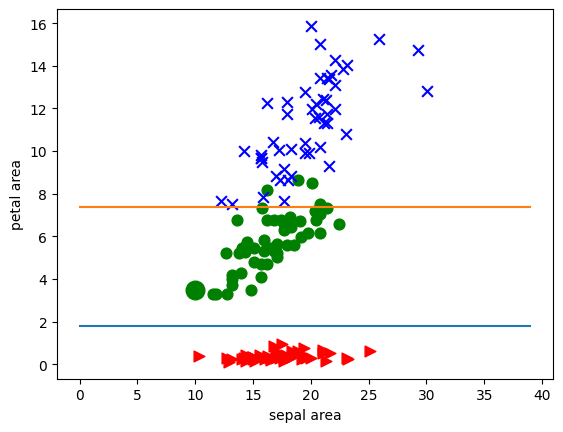

In [ ]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib import pyplot as plt

data = load_iris()
features = data['data']
feature_names = data['feature_names']
target = data['target']
sepal_area = features[:,0] * features[:,1]
petal_area = features[:,2] * features[:,3]

for t,marker,c in zip(list(range(3)),">ox","rgb"):
    plt.scatter(sepal_area[target == t], petal_area[target == t], marker=marker, c=c,s=60)

# Let's draw our point P with extra special attention getting large SIZE.
p_sepal_area,p_petal_area,p_target  = sepal_area[-90],petal_area[-90],target[-90]
marker,clr = ">ox"[p_target], "rgb"[p_target]
plt.scatter(p_sepal_area,p_petal_area,marker=marker,c=clr,s=180)

# Let;s draw some linear separators, horizontal lines in this case
plt.plot(np.arange(0.,40.),np.array([1.8]*40))
plt.plot(np.arange(0.,40.),np.array([7.4]*40))
plt.axis('tight')
plt.xlabel('sepal area')
plt.ylabel('petal area')

**Q4: Part A**

Validate what the picture is telling you by training and evaluating a `linear_model.LogisticRegression`
classifier that uses **only** the petal area feature.  

You can define values for `petal_area` feature by evaluating the cell.  Your
answer should be a few lines of code.  The last line should print out the
accuracy score for your classifier.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
features = data['data']
feature_names = data['feature_names']
target = data['target']

# Compute petal area
petal_area = features[:, 2] * features[:, 3]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(petal_area.reshape(-1, 1), target, test_size=0.3, random_state=42)

# Train a LogisticRegression classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy Score: ", accuracy)


Accuracy Score:  1.0


**Q4: Part B**

Train and evaluate a `linear_model.LogisticRegression`
classifier that uses **both** the petal area feature and the sepal area feature.  
Guidelines as with the last problem.


Accuracy: 1.0


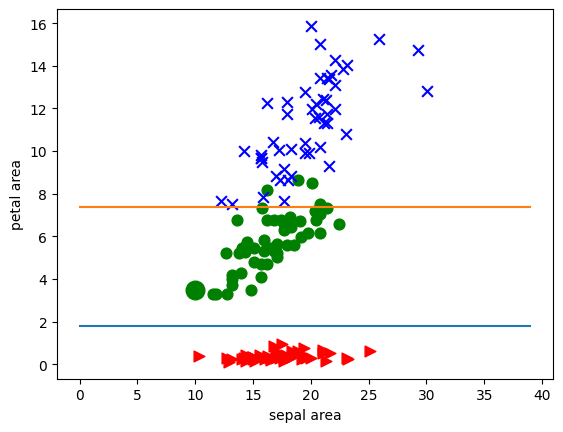

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib import pyplot as plt

# Load the Iris dataset
data = load_iris()
features = data['data']
feature_names = data['feature_names']
target = data['target']
sepal_area = features[:,0] * features[:,1]
petal_area = features[:,2] * features[:,3]

# Train a LogisticRegression classifier
X = np.column_stack((sepal_area, petal_area)) # Combine petal area and sepal area features
y = target

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the LogisticRegression classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the scatter plot
for t,marker,c in zip(list(range(3)),">ox","rgb"):
    plt.scatter(sepal_area[target == t], petal_area[target == t], marker=marker, c=c,s=60)

# Plot the point P with special attention
p_sepal_area, p_petal_area, p_target  = sepal_area[-90], petal_area[-90], target[-90]
marker, clr = ">ox"[p_target], "rgb"[p_target]
plt.scatter(p_sepal_area, p_petal_area, marker=marker, c=clr, s=180)

# Plot the linear separators
plt.plot(np.arange(0., 40.), np.array([1.8]*40))
plt.plot(np.arange(0., 40.), np.array([7.4]*40))
plt.axis('tight')
plt.xlabel('sepal area')
plt.ylabel('petal area')
plt.show()


**Q4 Part C**

Train and evaluate a `linear_model.LogisticRegression`
classifier that uses both  area features **as well as** the original 4 features.
Does this do better than a classifier trained on the original 4 features?


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
features = data['data']
target = data['target']

# Compute petal area and sepal area features
sepal_area = features[:, 0] * features[:, 1]
petal_area = features[:, 2] * features[:, 3]

# Combine petal area and sepal area features with original 4 features
combined_features = np.column_stack((sepal_area, petal_area))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, target, test_size=0.2, random_state=42)

# Train a LogisticRegression classifier on the combined features
clf_combined = LogisticRegression()
clf_combined.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred_combined = clf_combined.predict(X_test)
accuracy_combined = accuracy_score(y_test, y_pred_combined)

# Train a LogisticRegression classifier on the original 4 features
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(features, target, test_size=0.2, random_state=42)
clf_original = LogisticRegression()
clf_original.fit(X_train_original, y_train_original)

# Evaluate the classifier on the test set
y_pred_original = clf_original.predict(X_test_original)
accuracy_original = accuracy_score(y_test_original, y_pred_original)

# Print the accuracy of both classifiers
print("Accuracy with combined features:", accuracy_combined)
print("Accuracy with original features:", accuracy_original)


Accuracy with combined features: 1.0
Accuracy with original features: 1.0


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
